#Coding Assignment U2A1
Logistic Regression Program - Iris Flower
Author: Rahul Krishnan
Ref: https://archive.ics.uci.edu/ml/datasets/Iris

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## load file

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/iris.csv')

In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


##Understanding the data

In [ ]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   sepal_length  sepal_width  petal_length  petal_width  iris_class
0           5.1          3.5           1.4          0.2           1
1           4.9          3.0           1.4          0.2           1
2           4.7          3.2           1.3          0.2           1
3           4.6          3.1           1.5          0.2           1
4           5.0          3.6           1.4          0.2           1
       sepal_length  sepal_width  petal_length  petal_width  iris_class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    2.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    1.000000
25%        5.100000     2.800000      1.600000     0.300000    1.000000
50%        5.800000     3.000000      4.350000     1.300000    2.000000
75%        6.400000     3.300000      5.100000     1.800000    3.000000
max        7.900

## Selecting class labels, and featureset

In [ ]:
X = dataset.drop(columns='iris_class')
X_sepal = pd.concat([dataset['sepal_length'], dataset['sepal_width']], axis=1)
X_sepal_length = dataset['sepal_length']

print(X.head(), '\n')
print(X_sepal.head(), '\n')
print(X_sepal_length.head())

y = dataset['iris_class']
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6 

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64
0    1
1    1
2    1
3    1
4    1
Name: iris_class, dtype: int64


## Understanding the dataset

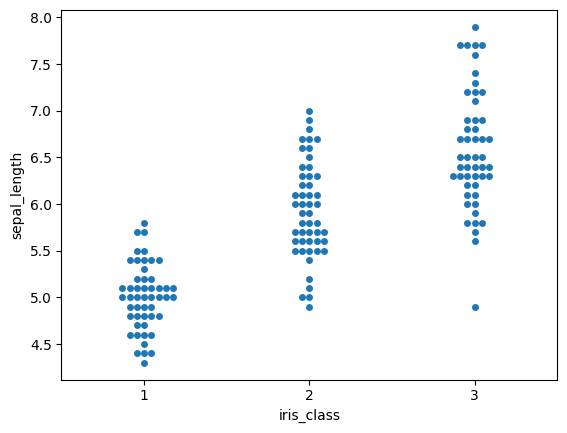

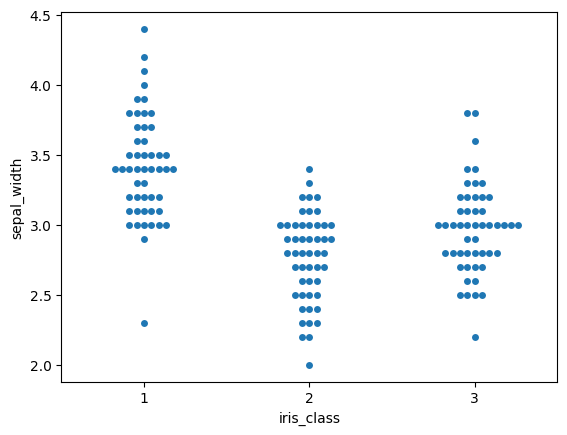

In [ ]:
import seaborn as sns
# Visualising the relationship between sepal_length and flower class
sns.swarmplot(x="iris_class", y="sepal_length", data=dataset)
plt.show()

#https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option

## Creating Logistic Reg. model and visualizing



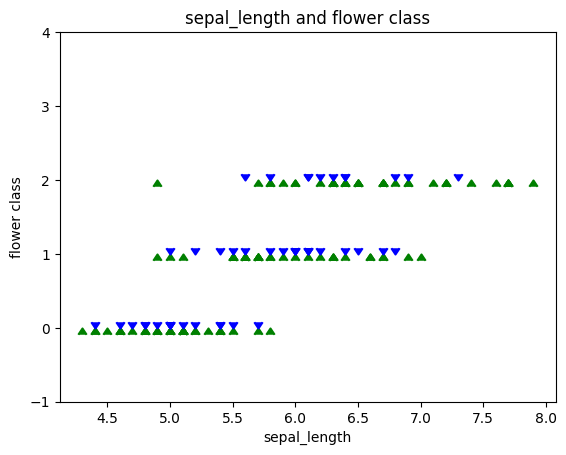

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_le = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_sepal_length, y_le,
                                                    test_size=0.3, random_state=0)

X_train = np.reshape(X_train.values, (-1,1))
X_test = np.reshape(X_test.values, (-1,1))

plt.scatter(X_train, y_train, c='g', marker=matplotlib.markers.CARETUP)
plt.scatter(X_test, y_test, c='b', marker=matplotlib.markers.CARETDOWN)
plt.title('sepal_length and flower class')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

In [ ]:
#X_sepal_length = np.reshape(X_sepal_length, (-1,1))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluate the performance of our model - Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

report = classification_report(y_test, y_pred)
print(report)

Accuracy of logistic regression classifier on test set: 0.69
[[14  2  0]
 [ 3 10  5]
 [ 0  4  7]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.62      0.56      0.59        18
           2       0.58      0.64      0.61        11

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.69      0.69      0.69        45



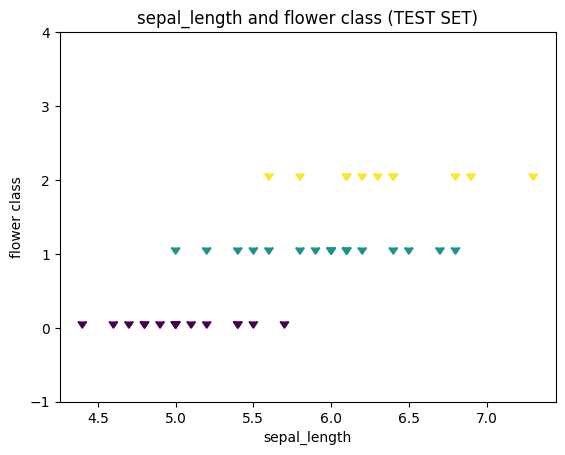

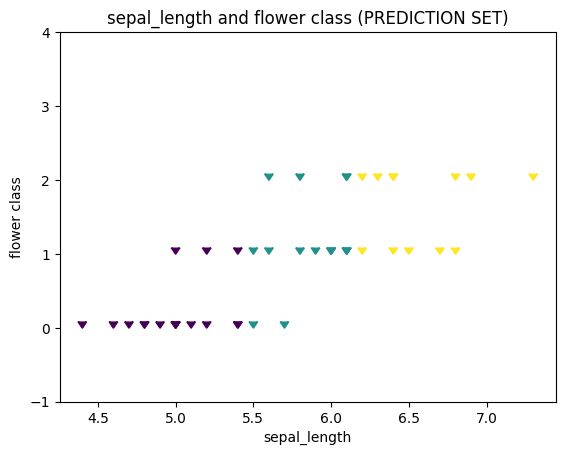

In [ ]:
# Visualising the results
plt.scatter(X_test, y_test, c=y_test, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (TEST SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

# Visualising the results
plt.scatter(X_test, y_test, c=y_pred, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (PREDICTION SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()